 import libraries

In [1]:
%reload_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

import seaborn as sns

import pickle
##from SCRIPT.eval_tools import *

 let's load some data! 🥒

In [2]:
with open('pickle/timeseries_twobedroom_subset_percent.pkl', 'rb') as fp:
    subset_percent = pickle.load(fp)

In [3]:
with open('pickle/timeseries_twobedroom_subset.pkl', 'rb') as fp:
    subset = pickle.load(fp)

In [4]:
subset.head(6)

,95823,95630,95624,95758,95608,95828,95670,95843,95610,95822,...,95816,95673,95817,95814,95626,95811,95683,95693,95690,95641
12/2003,164193.0,252759.0,199456.0,243115.0,205997.0,194670.0,238307.0,176481.0,216215.0,176131.0,...,329576.0,195999.0,179350.0,290739.0,196819.0,268606.0,324433.0,326369.0,211751.0,218840.0
01/2004,166601.0,254797.0,203104.0,245903.0,209331.0,197201.0,241035.0,178957.0,218780.0,178622.0,...,333728.0,198836.0,181765.0,295303.0,199992.0,272120.0,327964.0,328535.0,213377.0,222860.0
02/2004,169264.0,257940.0,206791.0,249049.0,212500.0,199791.0,244081.0,181549.0,221538.0,181204.0,...,338615.0,201322.0,184924.0,301135.0,203594.0,276095.0,331342.0,331569.0,211646.0,225659.0
03/2004,171857.0,261322.0,210230.0,252310.0,215963.0,202764.0,247512.0,183986.0,224690.0,184135.0,...,343235.0,205002.0,188781.0,307376.0,205319.0,280372.0,333947.0,332606.0,211770.0,226696.0
04/2004,174169.0,263765.0,213436.0,254449.0,218176.0,205390.0,249865.0,185519.0,227431.0,186040.0,...,346698.0,208171.0,191993.0,313792.0,206634.0,284208.0,336685.0,333174.0,212340.0,227460.0
05/2004,177386.0,267825.0,217575.0,257804.0,221594.0,209567.0,253615.0,188527.0,231124.0,189478.0,...,352044.0,212823.0,195741.0,321127.0,210147.0,288690.0,341013.0,337398.0,215266.0,229107.0


In [5]:
subset_percent.head()

,95823,95630,95624,95758,95608,95828,95670,95843,95610,95822,...,95816,95673,95817,95814,95626,95811,95683,95693,95690,95641
01/2004,1.466567,0.806302,1.828975,1.146782,1.618470,1.300149,1.144742,1.402984,1.186319,1.414288,...,1.259800,1.447456,1.346529,1.569793,1.612141,1.308236,1.088360,0.663666,0.767883,1.836959
02/2004,1.598430,1.233531,1.815326,1.279366,1.513870,1.313381,1.263717,1.448393,1.260627,1.445511,...,1.464366,1.250277,1.737958,1.974921,1.801072,1.460753,1.029991,0.923494,-0.811240,1.255945
03/2004,1.531926,1.311158,1.663032,1.309381,1.629647,1.488055,1.405681,1.342337,1.422781,1.617514,...,1.364381,1.827917,2.085722,2.072492,0.847274,1.549104,0.786197,0.312755,0.058588,0.459543
04/2004,1.345305,0.934862,1.524996,0.847767,1.024713,1.295102,0.950661,0.833216,1.219903,1.034567,...,1.008930,1.545839,1.701442,2.087346,0.640467,1.368182,0.819891,0.170773,0.269160,0.337015
05/2004,1.847057,1.539249,1.939223,1.318535,1.566625,2.033692,1.500810,1.621397,1.623789,1.847990,...,1.541976,2.234701,1.952155,2.337536,1.700107,1.577014,1.285475,1.267806,1.377979,0.724083


  train test split

In [6]:
trdf_percent = subset_percent.iloc[:-40]
trdf_percent.index = pd.to_datetime(trdf_percent.index)

In [7]:
trdf_price = subset.iloc[:-40]
trdf_price.index = pd.to_datetime(trdf_price.index)

 Average Percent Increase of Housing Price

In [8]:
subset_percent.head(3)

,95823,95630,95624,95758,95608,95828,95670,95843,95610,95822,...,95816,95673,95817,95814,95626,95811,95683,95693,95690,95641
01/2004,1.466567,0.806302,1.828975,1.146782,1.618470,1.300149,1.144742,1.402984,1.186319,1.414288,...,1.259800,1.447456,1.346529,1.569793,1.612141,1.308236,1.088360,0.663666,0.767883,1.836959
02/2004,1.598430,1.233531,1.815326,1.279366,1.513870,1.313381,1.263717,1.448393,1.260627,1.445511,...,1.464366,1.250277,1.737958,1.974921,1.801072,1.460753,1.029991,0.923494,-0.811240,1.255945
03/2004,1.531926,1.311158,1.663032,1.309381,1.629647,1.488055,1.405681,1.342337,1.422781,1.617514,...,1.364381,1.827917,2.085722,2.072492,0.847274,1.549104,0.786197,0.312755,0.058588,0.459543


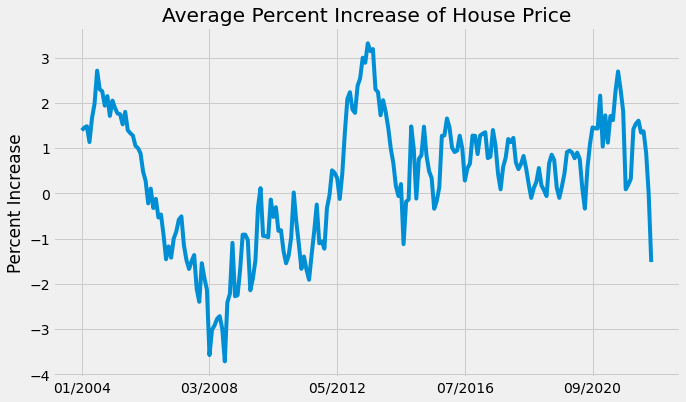

In [10]:
mean = np.mean(subset_percent, axis = 1)
ax = mean.plot(figsize = (10, 6))
plt.ylabel('Percent Increase')
plt.title('Average Percent Increase of House Price')
plt.show()

Average Housing Price

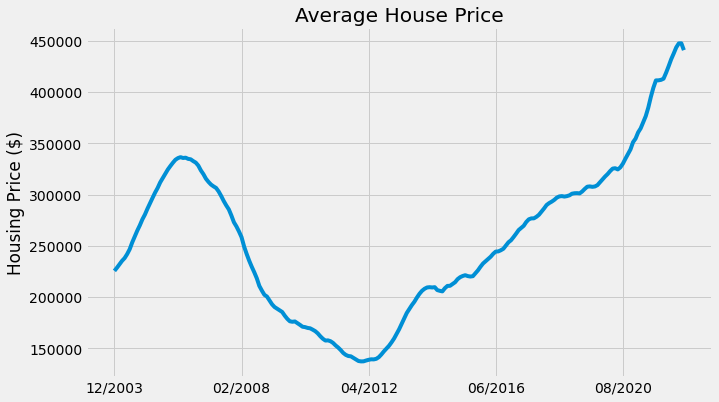

In [11]:
price_mean = np.mean(subset, axis = 1)
ax = price_mean.plot(figsize = (10, 6))
plt.ylabel('Housing Price ($)')
plt.title('Average House Price')
plt.show()

 Percent Increase All Zip Codes

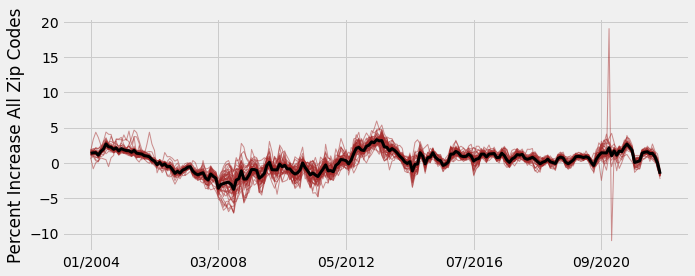

In [13]:
subset_percent.plot(figsize = (10, 4), lw = 1, color = 'brown', alpha = 0.5)
mean.plot(c = 'black', lw = 3)
plt.legend().set_visible(False)
plt.ylabel('Percent Increase All Zip Codes')
plt.show()

 Housing Price ($) All Zip Codes

In [14]:
subset.head(3)

,95823,95630,95624,95758,95608,95828,95670,95843,95610,95822,...,95816,95673,95817,95814,95626,95811,95683,95693,95690,95641
12/2003,164193.0,252759.0,199456.0,243115.0,205997.0,194670.0,238307.0,176481.0,216215.0,176131.0,...,329576.0,195999.0,179350.0,290739.0,196819.0,268606.0,324433.0,326369.0,211751.0,218840.0
01/2004,166601.0,254797.0,203104.0,245903.0,209331.0,197201.0,241035.0,178957.0,218780.0,178622.0,...,333728.0,198836.0,181765.0,295303.0,199992.0,272120.0,327964.0,328535.0,213377.0,222860.0
02/2004,169264.0,257940.0,206791.0,249049.0,212500.0,199791.0,244081.0,181549.0,221538.0,181204.0,...,338615.0,201322.0,184924.0,301135.0,203594.0,276095.0,331342.0,331569.0,211646.0,225659.0


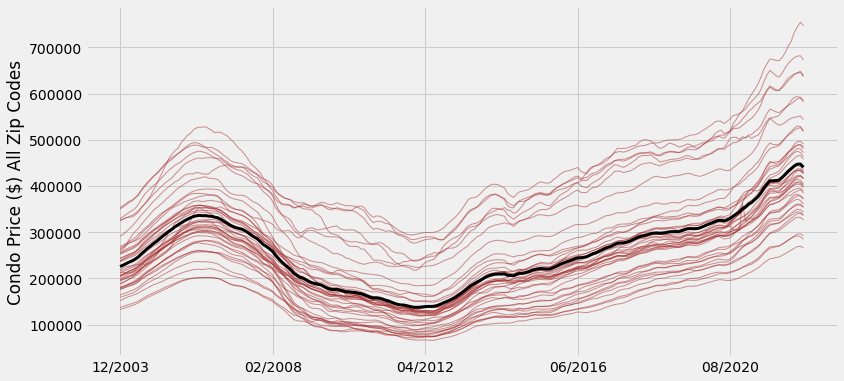

In [15]:
subset.plot(figsize = (12, 6), lw = 1, color = 'brown', alpha = 0.5)
price_mean.plot(c = 'black', lw = 3)
plt.legend().set_visible(False)
plt.ylabel('Condo Price ($) All Zip Codes')
plt.show()

 areas against the trend

 calculate absolute difference

In [16]:
diff_df = trdf_price.apply(lambda x: abs(x-mean))

 top 5 zipcodes with odd trends  

In [17]:
diffs = np.sum(diff_df, axis = 0).sort_values(ascending = False)
select_zipcodes = list(diffs.index[0:5])
print(f'top 5 zipcodes with odd trends: {select_zipcodes}')

top 5 zipcodes with odd trends: [95823, 95819, 95824, 95834, 95815]


 zip closest to average

In [18]:
print(f'closest to the average: {diffs.index[-2]}')

closest to the average: 95825
